Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
adanidf = yf.download('ADANIPORTS.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
adanidf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,253.699997,254.500000,249.000000,251.649994,242.208115,2954754
2015-12-17,253.000000,257.649994,252.000000,256.299988,246.683640,2430145
2015-12-18,256.000000,261.250000,253.550003,260.200012,250.437378,3384209
2015-12-21,261.549988,262.600006,257.950012,260.600006,250.822357,1249639
2015-12-22,261.299988,261.299988,256.350006,257.600006,247.934891,1992099


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
adanidf['Return_ADANI'] = np.log(adanidf['Adj Close']/adanidf['Adj Close'].shift(1))
print(adanidf['Return_ADANI']) 

Date
2015-12-16         NaN
2015-12-17    0.018309
2015-12-18    0.015102
2015-12-21    0.001536
2015-12-22   -0.011579
                ...   
2016-12-28    0.005789
2016-12-29   -0.014443
2016-12-30    0.014256
2017-01-02    0.019733
2017-01-03    0.000548
Name: Return_ADANI, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
adanidf.dropna(inplace=True)

In [ ]:
adanidf

,Open,High,Low,Close,Adj Close,Volume,Return_ADANI
Date,,,,,,,
2015-12-17,253.000000,257.649994,252.000000,256.299988,246.683640,2430145,0.018309
2015-12-18,256.000000,261.250000,253.550003,260.200012,250.437378,3384209,0.015102
2015-12-21,261.549988,262.600006,257.950012,260.600006,250.822357,1249639,0.001536
2015-12-22,261.299988,261.299988,256.350006,257.600006,247.934891,1992099,-0.011579
2015-12-23,259.000000,260.250000,255.850006,257.299988,247.646133,1924064,-0.001165
...,...,...,...,...,...,...,...
2016-12-28,267.899994,271.850006,267.100006,268.500000,259.596954,3862488,0.005789
2016-12-29,268.000000,268.100006,262.649994,264.649994,255.874664,4400374,-0.014443
2016-12-30,265.000000,271.149994,264.399994,268.450012,259.548645,3744173,0.014256


In [ ]:
adanireturns = adanidf['Return_ADANI']
adanireturns.head()


Date
2015-12-17    0.018309
2015-12-18    0.015102
2015-12-21    0.001536
2015-12-22   -0.011579
2015-12-23   -0.001165
Name: Return_ADANI, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,adanireturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_ADANI
Date,,
2015-12-17,0.011985,0.018309
2015-12-18,-0.010560,0.015102
2015-12-21,0.009297,0.001536
2015-12-22,-0.006191,-0.011579
2015-12-23,0.010203,-0.001165


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_ADANI  256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
nifty_df

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900,0.011985
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400,-0.010560
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300,0.009297
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700,-0.006191
2015-12-23,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900,0.010203
...,...,...,...,...,...,...,...
2016-12-28,8047.549805,8100.549805,8028.399902,8034.850098,8034.850098,126700,0.000249
2016-12-29,8030.600098,8111.100098,8020.799805,8103.600098,8103.600098,178500,0.008520
2016-12-30,8119.649902,8197.000000,8114.750000,8185.799805,8185.799805,127600,0.010093


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_ADANI']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ADANI   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.00e-22
Time:                        23:53:51   Log-Likelihood:                 616.95
No. Observations:                 256   AIC:                            -1230.
Df Residuals:                     254   BIC:                            -1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.001     -0.115      0.909      -0.003       0.003
Return_NIFTY     1.5494      0.144     10.739      0.000       1.265       1.833
==============================================================================
Omnibus:                       37.820   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.704
Skew:                           0.243   Prob(JB):                     2.98e-56
Kurtosis:                       7.872   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betaadanimm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

2.0026952765334138e-22

In [ ]:
returnsadani=returns

In [ ]:
returnsadani['ER_MM']=returnsadani['Return_NIFTY']*betaadanimm

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM
Date,,,
2015-12-17,0.011985,0.018309,0.018568
2015-12-18,-0.010560,0.015102,-0.016361
2015-12-21,0.009297,0.001536,0.014405
2015-12-22,-0.006191,-0.011579,-0.009591
2015-12-23,0.010203,-0.001165,0.015809
...,...,...,...
2016-12-28,0.000249,0.005789,0.000386
2016-12-29,0.008520,-0.014443,0.013201
2016-12-30,0.010093,0.014256,0.015637


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnsadani['Rm-Rf']=returnsadani['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_ADANI']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ADANI   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     115.3
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           2.00e-22
Time:                        23:54:06   Log-Likelihood:                 616.95
No. Observations:                 256   AIC:                            -1230.
Df Residuals:                     254   BIC:                            -1223.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.112      0.911      -0.003       0.003
Rm-Rf          1.5494      0.144     10.739      0.000       1.265       1.833
==============================================================================
Omnibus:                       37.820   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.704
Skew:                           0.243   Prob(JB):                     2.98e-56
Kurtosis:                       7.872   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsadani['ER_CAPM']=rfr+resultscapm.params[1]*returnsadani['Rm-Rf']

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699
...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\sanka\\Downloads\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699
...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527


In [ ]:
returnsadani.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-22', '2016-12-23', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-02',
               '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [ ]:
returnsadani=returnsadani.join(famadf)

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnsadani[['Rm-Rf','SMB','HML']]
y=returnsadani['Return_ADANI']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ADANI   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     45.82
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.14e-23
Time:                        23:54:59   Log-Likelihood:                 624.76
No. Observations:                 256   AIC:                            -1242.
Df Residuals:                     252   BIC:                            -1227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.130      0.897      -0.003       0.002
Rm-Rf          1.2633      0.159      7.941      0.000       0.950       1.577
SMB           -0.0017      0.002     -0.909      0.364      -0.005       0.002
HML            0.0056      0.001      3.862      0.000       0.003       0.008
==============================================================================
Omnibus:                       45.089   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.562
Skew:                           0.573   Prob(JB):                     2.56e-47
Kurtosis:                       7.336   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

0.005568061818987381

In [ ]:
returnsadani['ER_ff3']=rfr+resultsff3.params[1]*returnsadani['Rm-Rf']+resultsff3.params[3]*returnsadani['HML']

FAMA FRENCH 4

In [ ]:
X=returnsadani[['Rm-Rf','SMB','HML','MF']]
y=returnsadani['Return_ADANI']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ADANI   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     36.41
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           5.42e-24
Time:                        23:55:07   Log-Likelihood:                 627.61
No. Observations:                 256   AIC:                            -1245.
Df Residuals:                     251   BIC:                            -1227.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.199      0.843      -0.003       0.002
Rm-Rf          0.1689      0.487      0.347      0.729      -0.790       1.128
SMB           -0.0042      0.002     -1.987      0.048      -0.008    -3.6e-05
HML            0.0036      0.002      2.151      0.032       0.000       0.007
MF             0.0129      0.005      2.375      0.018       0.002       0.024
==============================================================================
Omnibus:                       48.058   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.471
Skew:                           0.657   Prob(JB):                     1.20e-46
Kurtosis:                       7.255   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsadani['ER_ff4']=rfr+resultsff4.params[1]*returnsadani['Rm-Rf']+resultsff4.params[3]*returnsadani['HML']+resultsff4.params[2]*returnsadani['SMB']+resultsff4.params[4]*returnsadani['MF']

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3
Date,,,,,,,,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.021917
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012982
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016457
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005152
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015942
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.002529
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012809
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.013443


In [ ]:
returnsadani['AR_MM']=returnsadani['Return_ADANI']-returnsadani['ER_MM']

In [ ]:
returnsadani['AR_CAPM']=returnsadani['Return_ADANI']-returnsadani['ER_CAPM']

In [ ]:
returnsadani['AR_ff3']=returnsadani['Return_ADANI']-returnsadani['ER_ff3']

In [ ]:
returnsadani['AR_ff4']=returnsadani['Return_ADANI']-returnsadani['ER_ff4']

In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,AR_MM,AR_CAPM,AR_ff3,ER_ff4,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.021917,-0.000259,-0.000149,-0.003607,0.023267,-0.004958
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012982,0.031463,0.031573,0.028084,-0.012422,0.027524
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016457,-0.012869,-0.012759,-0.014921,0.012182,-0.010646
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005152,-0.001987,-0.001877,-0.006426,-0.006499,-0.005080
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015942,-0.016974,-0.016864,-0.017107,0.018992,-0.020157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.002529,0.005404,0.005513,0.008319,-0.002123,0.007912
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012809,-0.027643,-0.027533,-0.027252,0.019496,-0.033938
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.013443,-0.001381,-0.001271,0.000813,0.013807,0.000450


In [ ]:
returnsadani_eventwindowbeyond=returnsadani[returnsadani['days to event']>=-20]

In [ ]:
returnsadani_eventwindowbeyond

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,AR_MM,AR_CAPM,AR_ff3,ER_ff4,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,0.007334,-0.002127,-0.001573,-0.002237,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,0.002208,0.009462,0.009572,0.005126,-0.000317,0.007652
2016-10-10,0.001287,-0.010738,0.001994,0.001087,0.001884,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,0.005547,-0.012732,-0.012622,-0.016284,0.005801,-0.016538
2016-10-13,-0.015675,-0.050098,-0.024287,-0.015875,-0.024397,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.023556,-0.025811,-0.025701,-0.026541,-0.021822,-0.028276
2016-10-14,0.001172,0.012860,0.001815,0.000972,0.001705,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.002057,0.011045,0.011155,0.010803,0.005567,0.007293
2016-10-17,-0.007367,-0.014255,-0.011414,-0.007567,-0.011524,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.009452,-0.002841,-0.002731,-0.004803,-0.016054,0.001799
2016-10-18,0.018316,0.062792,0.028379,0.018116,0.028269,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.025321,0.034414,0.034524,0.037472,0.020604,0.042188
2016-10-19,-0.002169,0.017082,-0.003360,-0.002369,-0.003470,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,0.000948,0.020442,0.020552,0.016134,0.003191,0.013890
2016-10-20,0.004643,0.049036,0.007194,0.004443,0.007084,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.014102,0.041841,0.041951,0.034933,0.010032,0.039003
2016-10-21,-0.000730,0.001751,-0.001131,-0.000930,-0.001241,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,-0.003025,0.002883,0.002993,0.004776,-0.002742,0.004493


In [ ]:
returnsadani_eventwindowbeyond['CAR_MM']=returnsadani_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnsadani_eventwindowbeyond['CAR_CAPM']=returnsadani_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnsadani_eventwindowbeyond['CAR_ff3']=returnsadani_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnsadani_eventwindowbeyond['CAR_ff4']=returnsadani_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnsadani_eventwindowbeyond

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,AR_MM,AR_CAPM,AR_ff3,ER_ff4,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,0.007334,-0.002127,-0.001573,-0.002237,0.228604,0.717509,0.078106,-0.143927,0.024852,...,0.002208,0.009462,0.009572,0.005126,-0.000317,0.007652,0.009462,0.009572,0.005126,0.007652
2016-10-10,0.001287,-0.010738,0.001994,0.001087,0.001884,0.213081,0.713678,-0.218750,0.292234,0.024852,...,0.005547,-0.012732,-0.012622,-0.016284,0.005801,-0.016538,-0.003270,-0.003050,-0.011158,-0.008887
2016-10-13,-0.015675,-0.050098,-0.024287,-0.015875,-0.024397,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.023556,-0.025811,-0.025701,-0.026541,-0.021822,-0.028276,-0.029081,-0.028751,-0.037699,-0.037162
2016-10-14,0.001172,0.012860,0.001815,0.000972,0.001705,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.002057,0.011045,0.011155,0.010803,0.005567,0.007293,-0.018036,-0.017596,-0.026896,-0.029870
2016-10-17,-0.007367,-0.014255,-0.011414,-0.007567,-0.011524,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.009452,-0.002841,-0.002731,-0.004803,-0.016054,0.001799,-0.020877,-0.020327,-0.031699,-0.028071
2016-10-18,0.018316,0.062792,0.028379,0.018116,0.028269,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.025321,0.034414,0.034524,0.037472,0.020604,0.042188,0.013537,0.014196,0.005772,0.014118
2016-10-19,-0.002169,0.017082,-0.003360,-0.002369,-0.003470,0.494551,0.671722,-0.331019,0.238067,0.024653,...,0.000948,0.020442,0.020552,0.016134,0.003191,0.013890,0.033979,0.034748,0.021906,0.028008
2016-10-20,0.004643,0.049036,0.007194,0.004443,0.007084,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.014102,0.041841,0.041951,0.034933,0.010032,0.039003,0.075820,0.076699,0.056839,0.067011
2016-10-21,-0.000730,0.001751,-0.001131,-0.000930,-0.001241,0.652782,-0.368136,0.081786,0.098028,0.024809,...,-0.003025,0.002883,0.002993,0.004776,-0.002742,0.004493,0.078703,0.079692,0.061616,0.071504


In [ ]:
returnsadani

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,AR_MM,AR_CAPM,AR_ff3,ER_ff4,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.021917,-0.000259,-0.000149,-0.003607,0.023267,-0.004958
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.012982,0.031463,0.031573,0.028084,-0.012422,0.027524
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.016457,-0.012869,-0.012759,-0.014921,0.012182,-0.010646
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.005152,-0.001987,-0.001877,-0.006426,-0.006499,-0.005080
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.015942,-0.016974,-0.016864,-0.017107,0.018992,-0.020157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.002529,0.005404,0.005513,0.008319,-0.002123,0.007912
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.012809,-0.027643,-0.027533,-0.027252,0.019496,-0.033938
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.013443,-0.001381,-0.001271,0.000813,0.013807,0.000450


In [ ]:
returnsadani_eventwindowbeyond[['Return_ADANI','CAR_MM']]

,Return_ADANI,CAR_MM
Date,,
2016-10-07,0.007334,0.009462
2016-10-10,-0.010738,-0.003270
2016-10-13,-0.050098,-0.029081
2016-10-14,0.012860,-0.018036
2016-10-17,-0.014255,-0.020877
2016-10-18,0.062792,0.013537
2016-10-19,0.017082,0.033979
2016-10-20,0.049036,0.075820
2016-10-21,0.001751,0.078703


In [ ]:
returnsadanifinal=returnsadani.join(returnsadani_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnsadanifinal.columns

Index(['Return_NIFTY', 'Return_ADANI', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB',
       'HML', 'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'AR_MM', 'AR_CAPM',
       'AR_ff3', 'ER_ff4', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsadanifinal

,Return_NIFTY,Return_ADANI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,AR_MM,AR_CAPM,AR_ff3,ER_ff4,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.018309,0.018568,0.011785,0.018459,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.021917,-0.000259,-0.000149,-0.003607,0.023267,-0.004958,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,0.015102,-0.016361,-0.010760,-0.016471,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.012982,0.031463,0.031573,0.028084,-0.012422,0.027524,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.001536,0.014405,0.009097,0.014295,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.016457,-0.012869,-0.012759,-0.014921,0.012182,-0.010646,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.011579,-0.009591,-0.006391,-0.009701,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.005152,-0.001987,-0.001877,-0.006426,-0.006499,-0.005080,NaN,NaN,NaN,NaN
2015-12-23,0.010203,-0.001165,0.015809,0.010003,0.015699,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.015942,-0.016974,-0.016864,-0.017107,0.018992,-0.020157,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,0.005789,0.000386,0.000049,0.000276,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,-0.002529,0.005404,0.005513,0.008319,-0.002123,0.007912,0.138427,0.144470,0.090909,0.103826
2016-12-29,0.008520,-0.014443,0.013201,0.008320,0.013091,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.012809,-0.027643,-0.027533,-0.027252,0.019496,-0.033938,0.110783,0.116936,0.063657,0.069887
2016-12-30,0.010093,0.014256,0.015637,0.009893,0.015527,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.013443,-0.001381,-0.001271,0.000813,0.013807,0.000450,0.109403,0.115666,0.064471,0.070337


Description of various factors used in above APM

- Market Model : For the market index model, we use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.

- CAPM : In the CAPM model, we use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.


- FF3 : For Fama 3 factor model, we defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group), G, comprised the bottom 30% stocks in terms of the B/M ratio.The remaining stocks were grouped as neutral (N) stocks,the value factor HML (High minusLow)is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies),the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies) High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. The third factor being the market risk premium to compute beta via regression.

- FF4 : For Fama 4 factor model, we used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

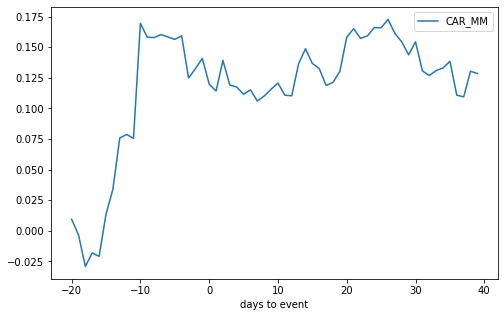

In [ ]:
returnsadanifinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

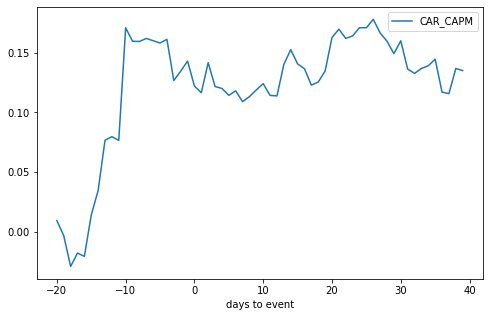

In [ ]:
returnsadanifinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

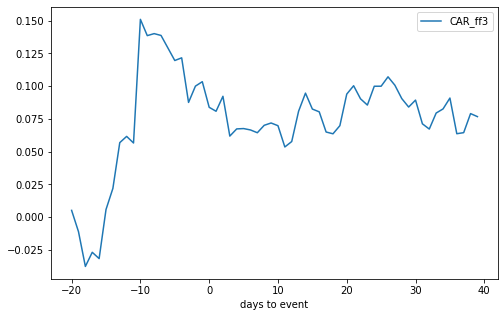

In [ ]:
returnsadanifinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

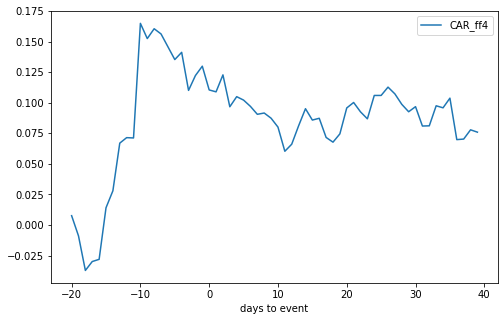

In [ ]:
returnsadanifinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

- Market Model:No major changes are observed in teh event window, the stock prices goes up marginally after the event window

- CAPM:No major changes are observed in teh event window, the stock prices goes up marginally after the event window

 - FF3: There is a dip leading upto to the event day from the pre event window, and remains relatively stable post the event day.

- FF4: There is an upward trend leading upto to the event day from the pre event window, and remains relatively stable post the event day.